In [81]:
from PIL import Image
import cv2
import numpy as np
import os
import cv2


In [82]:
# import zipfile
# path = 'Vasilii.zip'  
# zip_object = zipfile.ZipFile(file=path, mode='r')
# zip_object.extractall('./Vasilii')
# zip_object.close()


In [83]:
way = 'VasOg'

In [84]:
# i = 1
# for f in os.listdir(way):
#     os.rename(os.path.join(way, f), os.path.join(way, f"person.2.{i}.jpg"))
#     i += 1

In [85]:
def get_image_data():
  paths = [os.path.join(way, f) for f in os.listdir(way)] #SAME PATH
  print(paths)
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(path.split('.')[1])
    
    ids.append(id)
    faces.append(image_np)
  
  return np.array(ids), faces

In [86]:
import os
ids, faces = get_image_data()
ids

['VasOg\\person.1.1.jpg', 'VasOg\\person.1.10.jpg', 'VasOg\\person.1.11.jpg', 'VasOg\\person.1.12.jpg', 'VasOg\\person.1.13.jpg', 'VasOg\\person.1.14.jpg', 'VasOg\\person.1.15.jpg', 'VasOg\\person.1.16.jpg', 'VasOg\\person.1.17.jpg', 'VasOg\\person.1.18.jpg', 'VasOg\\person.1.19.jpg', 'VasOg\\person.1.2.jpg', 'VasOg\\person.1.20.jpg', 'VasOg\\person.1.21.jpg', 'VasOg\\person.1.22.jpg', 'VasOg\\person.1.23.jpg', 'VasOg\\person.1.24.jpg', 'VasOg\\person.1.25.jpg', 'VasOg\\person.1.26.jpg', 'VasOg\\person.1.27.jpg', 'VasOg\\person.1.28.jpg', 'VasOg\\person.1.29.jpg', 'VasOg\\person.1.3.jpg', 'VasOg\\person.1.30.jpg', 'VasOg\\person.1.31.jpg', 'VasOg\\person.1.32.jpg', 'VasOg\\person.1.33.jpg', 'VasOg\\person.1.4.jpg', 'VasOg\\person.1.5.jpg', 'VasOg\\person.1.6.jpg', 'VasOg\\person.1.7.jpg', 'VasOg\\person.1.8.jpg', 'VasOg\\person.1.9.jpg', 'VasOg\\person.2.1.jpg', 'VasOg\\person.2.10.jpg', 'VasOg\\person.2.11.jpg', 'VasOg\\person.2.12.jpg', 'VasOg\\person.2.13.jpg', 'VasOg\\person.2.14.j

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [87]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create() # make gray scale selfies  (approximately 40)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifierVasilii.yml')  #HERE I WRITE A CLASSIFIER, YOU CAN SEND YOUR PICTURES AND MAKE YOUR OWN CLASSIFIER

In [88]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifierVasilii.yml')

In [89]:
image = Image.open(way+'/person.2.1.jpg')
image.size

(165, 220)

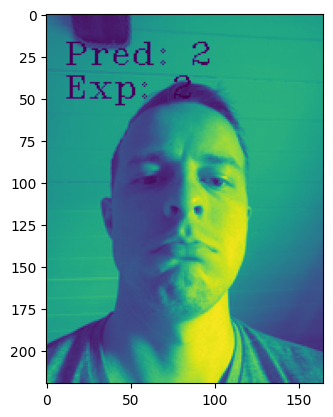

In [90]:
paths = [os.path.join(way+'/', f) for f in os.listdir(way+'/')]
import matplotlib.pyplot as plt
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split('.')[1])

  cv2.putText(image_np, 'Pred: ' + str(prediction), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  
plt.imshow(image_np)
plt.show()
